# MinMax Problem

This is a variation of shortest path.

Given an acyclic graph **G** with weighted edges, the shortest path problem is to find the path from source s to target t whose weighted length is minimal.

Each path is a sequence of edges, and its length is the sum of the weights
of the edges in the path.

The maximal link in any path is the maximum of the weights of the edges in the path.

The MINMAX problem is to find the path from s to t whose maximal link is minimal.

* find $f(1,0)$

$f(k,i) = \min \limits_j \left \{ \max \left \{  b(i,j), f(k+1, j) \right \}  \right \}$

Base conditions:  
$f(N-1, i) = b(i, N)$

<span style="color:red">The implementation considers that:</span>
* <span style="color:red">the source node has index 0 and </span>
* <span style="color:red">destination node has index N-1</span>

## When is this problem in real life?

Imagine that the graph represents the possible routes of a truck leaving a warehouse to a store. Each edge represents the toll  the driver will pay. The values are not cumulative, that is, the driver only pays the difference up to the maximum value of the route. This means that he pays the value of the maximal edge of the path. 
The problem is to find out what is the lowest possible amount that the driver will pay.

In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [19, 9]
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## to draw the graphs

In [3]:
def create_graph(B):
    G=nx.DiGraph()
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            if not np.isinf(B[i, j]):
                G.add_edge(i, j, weight=B[i, j])
    return G

In [4]:
def draw_graph(B):
    plt.figure(1, figsize=(16, 9))
    G=create_graph(B)
    pos=nx.spring_layout(G)  # random_layout(G)
    
    ax = plt.gca()
    
    _ = nx.draw_networkx(G, pos, ax=ax, font_size=20,
                         node_size=500,
                         node_color="yellow")
    labels = nx.get_edge_attributes(G, 'weight')
    _ = nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=labels, font_size=20)  

    plt.show()

# Minimum Maximum implementation

In [5]:
def minimum_maximum(G, verbose=False):
    N = B.shape[0]

    # auxiliar 
    f = np.zeros((N - 1, N))
    # base case
    for i in range(N):
        f[N - 2, i] = B[i,N - 1]
    
    max_k = N - 3
    for k in range(max_k, -1, -1):
        for i in range(N):
            _m = [max(B[i, j], f[k + 1, j]) for j in range(N)]
            f[k, i] = np.min(_m)
        # check if processed the line with the source
        if not np.isinf(f[k, 0]) and np.all(f[k, 1:]):
            break
    
    if verbose:
        # final matrix
        print(f[k:, :])
    return f[k, 0]

Note in the loop the trick we use to recognize the number of steps (k) of the problem. Since previously finding the k value is an NP-complete problem, it is extremely costly to find this value a priori. However, we take advantage of two characteristics of this problem. The graph is acyclic, and from this in the worst situation for a graph of N vertices, we will have N-1 edges.

In addition to this, as we place the origin as the vertex of index 0 and the destination as vertex of index N-1, we know that the solution was found when the line F [k] contains only one value in the position F [k, 0] and the other values are equal to infinity.

This is because the origin has no incoming edge of a vertex (or set of vertices) that are part of the steps we evaluated to reach the destination (see the last example of this notebook). If there was a vertex with an incoming edge at the origin and that was also part of the following steps, we would have a cycle, which by definition of the problem cannot occur.

# Examples

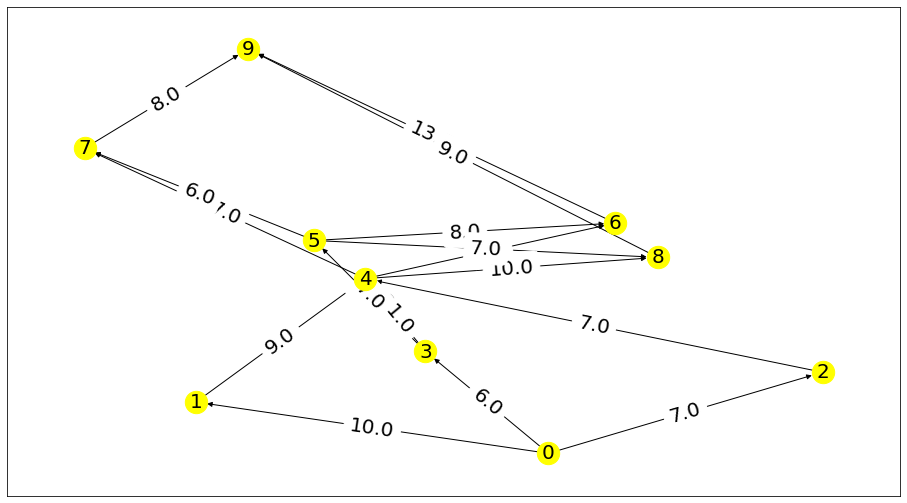

In [6]:
B = np.array([[np.inf, 10, 7, 6, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, 9, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, 7, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, 11, 7, np.inf, np.inf, np.inf, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 8, 7, 10, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 8, 6, 7, np.inf, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 13, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 8, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 9, ],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, ],
     ])
draw_graph(B)

In [7]:
minimum_maximum(B)

8.0

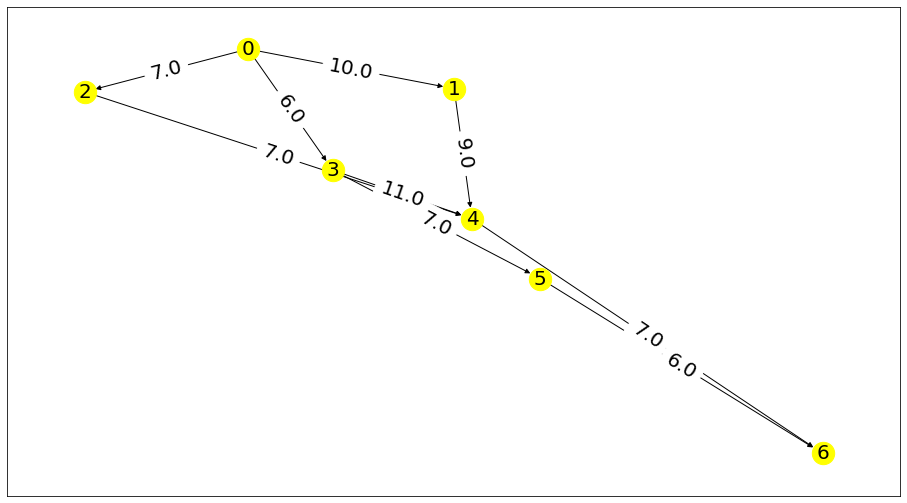

In [8]:
B = np.array([[np.inf, 10, 7, 6, np.inf, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 9, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 7, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 11, 7, np.inf],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 7],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 6],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf],
     ])
draw_graph(B)

In [9]:
minimum_maximum(B)

7.0

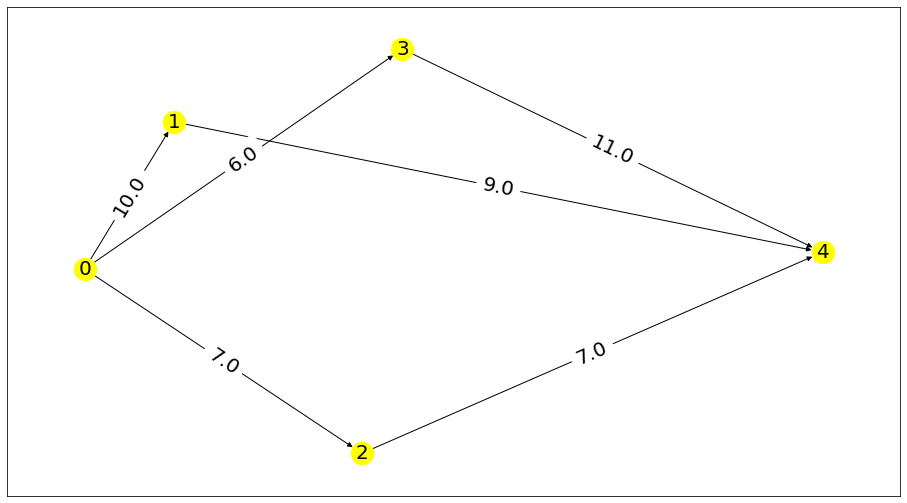

In [10]:
B = np.array([[np.inf, 10, 7, 6, np.inf],
     [np.inf, np.inf, np.inf, np.inf, 9],
     [np.inf, np.inf, np.inf, np.inf, 7],
     [np.inf, np.inf, np.inf, np.inf, 11],
     [np.inf, np.inf, np.inf, np.inf, np.inf],
     ])
draw_graph(B)

In [11]:
# print matrix F to see the results

minimum_maximum(B, verbose=True)

[[ 7. inf inf inf inf]
 [inf  9.  7. 11. inf]]


7.0

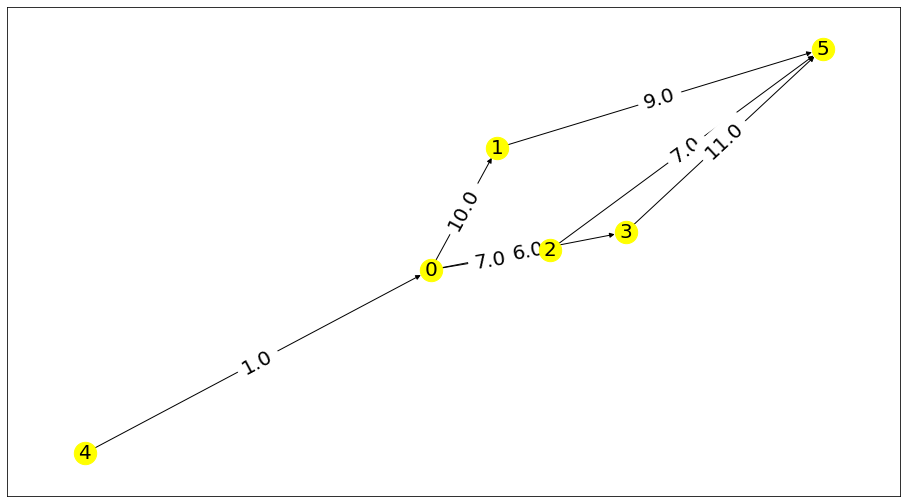

In [12]:
# add a node (4) that points to the origin

B = np.array([[np.inf, 10, 7, 6, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, np.inf, 9],
     [np.inf, np.inf, np.inf, np.inf, np.inf, 7],
     [np.inf, np.inf, np.inf, np.inf, np.inf, 11],
     [1, np.inf, np.inf, np.inf, np.inf, np.inf],
     [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf],
     ]) 
draw_graph(B)

In [13]:
# print matrix F to see the results
# notice that because no 4 does not take part in the calculation of the steps from origin to destination
# its presence does not affect the calculations

minimum_maximum(B, verbose=True)

[[ 7. inf inf inf inf inf]
 [inf  9.  7. 11. inf inf]]


7.0

In [14]:
# also notice that there is no way to have an incoming edge at (4) from the other nodes that does not create a cycle